# MUSE DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.interpolate import interp1d
import os

% matplotlib inline

### Constants

In [2]:
c = 299792 #km/s
lya_lambda = 1215.67 #nm
lya_nu = 2.46 * (10**15) #Hz

### Main Table

In [3]:
hdul = fits.open('MW_1-24_main_table.fits')
hdul.info()

Filename: MW_1-24_main_table.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       4   ()      
  1              BinTableHDU     39   831R x 14C   [21A, D, D, D, D, 5A, D, 5A, I, 60A, 5A, D, 5A, D]   


In [4]:
data = hdul[1].data
hdul.close()

In [5]:
data.columns

ColDefs(
    name = 'UNIQUE_ID'; format = '21A'
    name = 'RA'; format = 'D'; unit = 'deg'
    name = 'DEC'; format = 'D'; unit = 'deg'
    name = 'Z'; format = 'D'
    name = 'Z_ERR'; format = 'D'
    name = 'LEAD_LINE'; format = '5A'
    name = 'SN'; format = 'D'
    name = 'QUALITY'; format = '5A'
    name = 'CONFIDENCE'; format = 'I'
    name = 'OTHER_LINES'; format = '60A'
    name = 'Guo_ID'; format = '5A'
    name = 'Guo_sep'; format = 'D'
    name = 'Skelton_ID'; format = '5A'
    name = 'Skelton_sep'; format = 'D'
)

In [6]:
# filter by high quality = a

q = 'a'

#data = data[data['QUALITY'] == q]

print(data.size)

831


In [7]:
print(set(data['LEAD_LINE']))
ii = data['LEAD_LINE']=='Lya'
lya_ids = data['UNIQUE_ID'][ii]
lya_zs = data['Z'][ii]
lya_qs = data['QUALITY'][ii]
print(np.count_nonzero(ii))

{'O3_1', 'C4', 'N2_2', 'Ne3', 'Hb', 'Ha', 'O3_2', 'O2', 'Lya'}
237


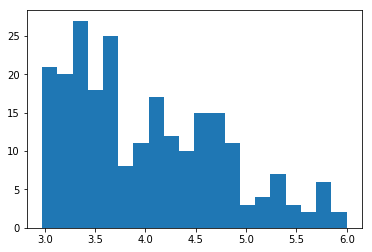

In [8]:
a = plt.hist(lya_zs, bins=20)

In [9]:
n_lya = len(lya_ids)
print(n_lya)

237


In [10]:
for i in range(n_lya):
    path = "./data/"
    filename = "spectrum_{}.fits.gz".format(lya_ids[i])
    url_filename = "http://data.muse-vlt.eu/MW_1-24/1d_spectra/{}".format(filename)
    print(filename)
    if(not os.path.isfile(path+filename)):
        !wget $url_filename -P $path

spectrum_101005016.fits.gz
spectrum_101009024.fits.gz
spectrum_101010025.fits.gz
spectrum_101011026.fits.gz
spectrum_101012027.fits.gz
spectrum_101015031.fits.gz
spectrum_101016032.fits.gz
spectrum_101023043.fits.gz
spectrum_101024044.fits.gz
spectrum_101025045.fits.gz
spectrum_101026046.fits.gz
spectrum_101027047.fits.gz
spectrum_101030050.fits.gz
spectrum_102012085.fits.gz
spectrum_102013086.fits.gz
spectrum_102014087.fits.gz
spectrum_102015088.fits.gz
spectrum_102019097.fits.gz
spectrum_102046172.fits.gz
spectrum_102049176.fits.gz
spectrum_103001001.fits.gz
spectrum_103002002.fits.gz
spectrum_103005045.fits.gz
spectrum_103006046.fits.gz
spectrum_103008055.fits.gz
spectrum_103009056.fits.gz
spectrum_103010057.fits.gz
spectrum_103011058.fits.gz
spectrum_103018081.fits.gz
spectrum_103019082.fits.gz
spectrum_103026097.fits.gz
spectrum_103031105.fits.gz
spectrum_103032106.fits.gz
spectrum_103033107.fits.gz
spectrum_103034108.fits.gz
spectrum_103044120.fits.gz
spectrum_103050126.fits.gz
s

### Emline Table

In [11]:
hdul = fits.open('MW_1-24_emline_table.fits')
hdul.info()

Filename: MW_1-24_emline_table.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       4   ()      
  1              BinTableHDU     81   1652R x 27C   [10A, I, I, I, 5A, 27A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, L]   


In [12]:
data = hdul[1].data
hdul.close()

In [13]:
data.columns

ColDefs(
    name = 'UNIQUE_ID'; format = '10A'
    name = 'POINTING_ID'; format = 'I'
    name = 'OBJ_ID'; format = 'I'
    name = 'RID'; format = 'I'
    name = 'IDENT'; format = '5A'
    name = 'COMMENT'; format = '27A'
    name = 'SN'; format = 'D'
    name = 'RA_SN'; format = 'D'; unit = 'deg'
    name = 'DEC_SN'; format = 'D'; unit = 'deg'
    name = 'LAMBDA_SN'; format = 'D'; unit = 'Angstrom'
    name = 'RA_PEAK_SN'; format = 'D'; unit = 'deg'
    name = 'DEC_PEAK_SN'; format = 'D'; unit = 'deg'
    name = 'LAMBDA_PEAK_SN'; format = 'D'; unit = 'Angstrom'
    name = 'LAMBDA_NB_MIN'; format = 'D'; unit = 'Angstrom'
    name = 'LAMBDA_NB_MAX'; format = 'D'; unit = 'Angstrom'
    name = 'RA_1MOM'; format = 'D'; unit = 'deg'
    name = 'DEC_1MOM'; format = 'D'; unit = 'deg'
    name = 'R_KRON'; format = 'D'; unit = 'arcsec'
    name = 'F_KRON'; format = 'D'; unit = 'cm-2 erg s-1'
    name = 'F_2KRON'; format = 'D'; unit = 'cm-2 erg s-1'
    name = 'F_3KRON'; format = 'D'; unit = 'c

In [14]:
# Filter by previous uids

lya_peak, lya_min, lya_max = [], [], []

for d in data:
    if ((d['UNIQUE_ID'] in lya_ids) and ('Lya' == d['IDENT'])):
        lya_peak.append(d['LAMBDA_PEAK_SN']) # angstroms 
        lya_min.append(d['LAMBDA_NB_MIN']) # angstroms 
        lya_max.append(d['LAMBDA_NB_MAX']) # angstroms 

In [15]:
print(lya_ids)
print(lya_zs)
print(lya_peak)
print(lya_min)
print(lya_max)

['101005016' '101009024' '101010025' '101011026' '101012027' '101015031'
 '101016032' '101023043' '101024044' '101025045' '101026046' '101027047'
 '101030050' '102012085' '102013086' '102014087' '102015088' '102019097'
 '102046172' '102049176' '103001001' '103002002' '103005045' '103006046'
 '103008055' '103009056' '103010057' '103011058' '103018081' '103019082'
 '103026097' '103031105' '103032106' '103033107' '103034108' '103044120'
 '103050126' '104004029' '104007038' '104009041' '104012048' '104014050'
 '104015052' '104019059' '104024069' '104032086' '105005027' '105007031'
 '105009034' '106003018' '106004019' '106007033' '106008034' '106009035'
 '106012043' '106014046' '106015047' '106019055' '106021059' '106025070'
 '106027072' '106032083' '106035088' '107004077' '107008086' '107015098'
 '107016099' '107024120' '107033150' '107034151' '107041159' '108006104'
 '108009107' '108010108' '108017130' '108030156' '109003027' '109004028'
 '109006034' '109008036' '109009037' '109010038' '1

### Spectra

In [16]:
lya_xs, lya_ys = [], []

for i in range(n_lya):
    path = 'data/'
    fn = 'spectrum_' + str(lya_ids[i]) + '.fits.gz'
    hdul = fits.open(path+fn)
    data = hdul[1].data
    hdul.close()
    
    x = data['WAVE_VAC'] # angstroms 
    y = data['FLUX']
    z = lya_zs[i]
    
    peak = lya_peak[i]
    minn = lya_min[i]
    maxx = lya_max[i]
    
    '''
    plt.plot(x,y)
    plt.axvline(peak, 0, 1, linestyle='--',  color='k')
    plt.axvline(minn, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.axvline(maxx, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.xlim(minn-10, maxx+10)
    plt.show()
    '''
    
    # redshift
    x = x/(1+z) 
    peak = peak/(1+z)
    minn = minn/(1+z)
    maxx = maxx/(1+z)
    
    '''
    plt.plot(x,y)
    plt.axvline(peak, 0, 1, linestyle='--',  color='k')
    plt.axvline(minn, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.axvline(maxx, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.xlim(minn-5, maxx+5)
    plt.show()
    '''
    
    # angstrom to velocity (km/s)
    x = c*(1 - lya_lambda/x)
    peak = c*(1 - lya_lambda/peak)
    minn = c*(1 - lya_lambda/minn)
    maxx = c*(1 - lya_lambda/maxx)
    
    '''
    plt.plot(x,y)
    plt.axvline(peak, 0, 1, linestyle='--',  color='k')
    plt.axvline(minn, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.axvline(maxx, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.xlim(peak-1000, peak+1000)
    plt.show()
    '''
    
    # center
    x = x - peak
    minn = minn - peak
    maxx = maxx - peak
    peak = 0
    
    '''
    plt.plot(x,y)
    plt.axvline(peak, 0, 1, linestyle='--',  color='k')
    plt.axvline(minn, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.axvline(maxx, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.xlim(minn-5, maxx+5)
    plt.show()
    '''
    
    # save them
    lya_peak[i] = peak
    lya_min[i] = minn
    lya_max[i] = maxx
    
    lya_xs.append(x)
    lya_ys.append(y)

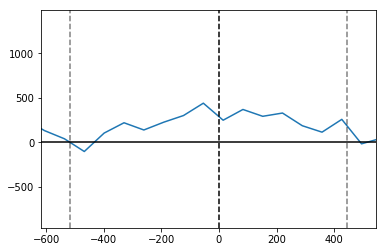

In [17]:
# Example 

plt.plot(lya_xs[1], lya_ys[1])
plt.xlim(lya_min[1]-100, lya_max[1]+100)
plt.axvline(lya_peak[1], 0, 1, linestyle='--',  color='k')
plt.axvline(lya_min[1], 0, 1, linestyle='--',  color='k', alpha=0.5)
plt.axvline(lya_max[1], 0, 1, linestyle='--',  color='k', alpha=0.5)
plt.axhline(0, 0, 1, linestyle='-',  color='k')

In [18]:
# MEANs, STDs, SKWs and BIs
lya_means, lya_stds, lya_skws, lya_bis = [], [], [], []

for i in range(n_lya):
    
    # data of spectrum i
    x = lya_xs[i]
    y = lya_ys[i]
    
    # only the lya line
    inds_sub = np.where((x>=lya_min[i]) & (x<=lya_max[i]))
    x_sub = x[inds_sub]
    y_sub = y[inds_sub]
    
    # removing the ones with negative flows
    inds = np.where(y_sub<0.0)[0]
    y_sub[inds] = 0.0
    y_non_zero = len(y_sub) - len(inds)
    
    # get integer frequencies 
    f_sub = y_sub.astype(int)
    n = np.sum(f_sub)
    
    mean, std, skw, bi = 0, 0, 0, 0
    if ((n != 0) and (y_non_zero > 1)):
        # mean
        mean = np.sum(f_sub*x_sub) / n

        # moments m2 (variance) and m3
        m2, m3, m4 = 0, 0, 0
        for j in range(len(x_sub)):
            f_j = f_sub[j]
            x_j = x_sub[j]
            if f_j > 0:
                m2 += f_j * (x_j-mean)**2
                m3 += f_j * (x_j-mean)**3
                m4 += f_j * (x_j-mean)**4
        m2 = m2 / n
        m3 = m3 / n
        m4 = m4 / n
        
        # std and skw
        std = np.sqrt(m2)
        skw = m3 / (m2**1.5)
        kurt = m4 / (m2**2)
        bi = kurt - skw**2
    else:
        # mark terrible spectra
        lya_qs[i] = 'x'
        
    lya_means.append(mean)
    lya_stds.append(std)
    lya_skws.append(skw)
    lya_bis.append(bi)
    
    #y_sub = y_sub/np.sum(y_sub)
    #sub = np.array([x_sub, y_sub]).T
    #fn = 'muse_lya_' + str(lya_ids[i]) + '.txt'
    #np.savetxt(fn, sub)

(array([  1.,   1.,   1.,   0.,   3.,   1.,   2.,   0.,   4.,  10.,  17.,
         28.,  30.,  37.,  21.,  24.,  17.,  12.,   6.,   5.,   5.,   2.,
          3.,   2.,   0.,   0.,   1.,   0.,   1.,   3.]),
 array([-432.39235152, -394.5828408 , -356.77333008, -318.96381936,
        -281.15430864, -243.34479792, -205.5352872 , -167.72577648,
        -129.91626576,  -92.10675504,  -54.29724432,  -16.48773359,
          21.32177713,   59.13128785,   96.94079857,  134.75030929,
         172.55982001,  210.36933073,  248.17884145,  285.98835217,
         323.79786289,  361.60737361,  399.41688433,  437.22639506,
         475.03590578,  512.8454165 ,  550.65492722,  588.46443794,
         626.27394866,  664.08345938,  701.8929701 ]),
 <a list of 30 Patch objects>)

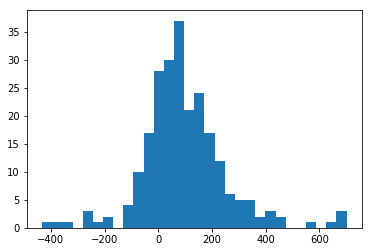

In [19]:
plt.hist(lya_means, bins=30)

(array([  3.,   5.,   4.,   9.,  17.,  25.,  25.,  30.,  10.,  16.,  17.,
         16.,  15.,  10.,   9.,   8.,   4.,   1.,   1.,   2.,   2.,   1.,
          2.,   1.,   3.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.        ,   20.0906234 ,   40.18124681,   60.27187021,
          80.36249361,  100.45311702,  120.54374042,  140.63436383,
         160.72498723,  180.81561063,  200.90623404,  220.99685744,
         241.08748084,  261.17810425,  281.26872765,  301.35935105,
         321.44997446,  341.54059786,  361.63122127,  381.72184467,
         401.81246807,  421.90309148,  441.99371488,  462.08433828,
         482.17496169,  502.26558509,  522.35620849,  542.4468319 ,
         562.5374553 ,  582.6280787 ,  602.71870211]),
 <a list of 30 Patch objects>)

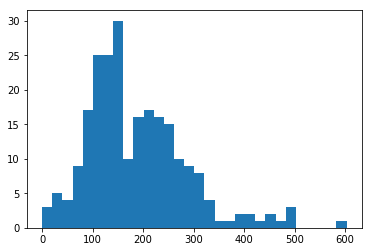

In [20]:
plt.hist(lya_stds, bins=30)

(array([  1.,   1.,   3.,   2.,   2.,   2.,   4.,   2.,   5.,   9.,  19.,
         21.,  21.,  20.,  31.,  28.,  21.,  20.,   5.,   5.,   5.,   6.,
          0.,   0.,   2.,   1.,   0.,   0.,   0.,   1.]),
 array([-2.52888041, -2.3499292 , -2.17097799, -1.99202678, -1.81307557,
        -1.63412437, -1.45517316, -1.27622195, -1.09727074, -0.91831954,
        -0.73936833, -0.56041712, -0.38146591, -0.2025147 , -0.0235635 ,
         0.15538771,  0.33433892,  0.51329013,  0.69224134,  0.87119254,
         1.05014375,  1.22909496,  1.40804617,  1.58699737,  1.76594858,
         1.94489979,  2.123851  ,  2.30280221,  2.48175341,  2.66070462,
         2.83965583]),
 <a list of 30 Patch objects>)

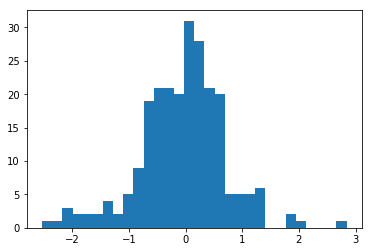

In [21]:
plt.hist(lya_skws, bins=30)

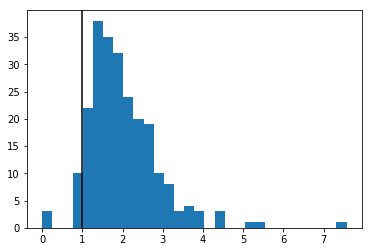

In [22]:
plt.hist(lya_bis, bins=30)
plt.axvline(1,0,1,c='k')

In [23]:
stats = np.array([lya_stds, lya_skws, lya_bis, lya_qs]).T
np.savetxt('muse_stats.txt', stats, fmt='%s') # std, skw, bi, q

In [24]:
stats

array([['276.796927454', '-0.581899056585', '1.91291171943', 'c'],
       ['225.097266447', '-0.00537736733082', '2.17301584483', 'c'],
       ['155.013925456', '0.186864070791', '2.77115068447', 'c'],
       ['174.981472849', '0.473780075727', '2.9785351546', 'c'],
       ['148.02211779', '0.158855424672', '3.81227809573', 'c'],
       ['108.526990938', '0.315035300817', '2.35998387965', 'c'],
       ['254.542925519', '0.520870431785', '2.3794821853', 'c'],
       ['208.682648077', '0.172417746014', '2.84918130584', 'c'],
       ['131.41954684', '0.00575527341786', '3.09669393081', 'c'],
       ['106.32956556', '-0.0107716322007', '2.31049315297', 'c'],
       ['73.1987770603', '0.272749195815', '3.17988565762', 'c'],
       ['101.284827839', '-0.456818408832', '2.75264949019', 'c'],
       ['83.4302885741', '0.666996998688', '1.8806458449', 'c'],
       ['145.362949275', '0.304776218414', '2.60307927079', 'c'],
       ['204.275271557', '-0.60629450657', '3.71879343274', 'c'],
       

3.81227809573


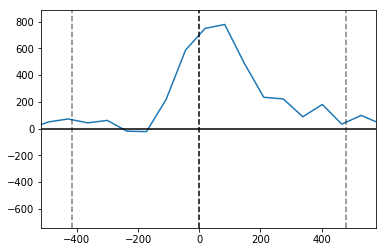

In [25]:
# Unimodal
ind = 4

plt.plot(lya_xs[ind], lya_ys[ind])
plt.xlim(lya_min[ind]-100, lya_max[ind]+100)
plt.axvline(lya_peak[ind], 0, 1, linestyle='--',  color='k')
plt.axvline(lya_min[ind], 0, 1, linestyle='--',  color='k', alpha=0.5)
plt.axvline(lya_max[ind], 0, 1, linestyle='--',  color='k', alpha=0.5)
plt.axhline(0, 0, 1, linestyle='-',  color='k')

print(lya_bis[ind])

2.74215349306


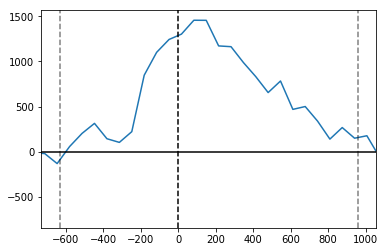

In [26]:
# Bimodal 
ind = 41

plt.plot(lya_xs[ind], lya_ys[ind])
plt.xlim(lya_min[ind]-100, lya_max[ind]+100)
plt.axvline(lya_peak[ind], 0, 1, linestyle='--',  color='k')
plt.axvline(lya_min[ind], 0, 1, linestyle='--',  color='k', alpha=0.5)
plt.axvline(lya_max[ind], 0, 1, linestyle='--',  color='k', alpha=0.5)
plt.axhline(0, 0, 1, linestyle='-',  color='k')

print(lya_bis[ind])

In [27]:
a = lya_ids[lya_qs=='a']
a

chararray(['104014050', '115003085'], 
      dtype='<U21')

In [28]:
np.argwhere(lya_ids==a[0])

array([[41]])

In [29]:
np.argwhere(lya_ids==a[1])

array([[115]])

### Compare to simulations

In [56]:
vouts = [5,25,50]
logtaus = [5, 6, 7]

std_doppler_scatter, skw_doppler_scatter = [], []
candidates_std_scatter, candidates_skw_scatter = [], []
candidates_std_only_scatter, candidates_skw_only_scatter = [], []

for logtau in logtaus:
    for vout in vouts:
        stats_doppler_fn = "../plots/paper/results/stats_logtau{}_vout{}.txt".format(logtau, vout)
        stats_doppler = np.loadtxt(stats_doppler_fn)
        
        vrots_doppler = stats_doppler[:,0]
        std_doppler = stats_doppler[:,1]
        skw_doppler = stats_doppler[:,2]
        bi_doppler = stats_doppler[:,3]
        
        std_doppler_scatter = np.concatenate((std_doppler_scatter, std_doppler))
        skw_doppler_scatter = np.concatenate((skw_doppler_scatter, skw_doppler))
        
        std_min, std_max = np.min(std_doppler), np.max(std_doppler)
        skw_min, skw_max = np.min(skw_doppler), np.max(skw_doppler)
        
        f_std = interp1d(std_doppler, vrots_doppler)
        f_skw = interp1d(skw_doppler, vrots_doppler)
        
        candidates_indices_std = []
        candidates_vrot_std, candidates_std = [], []
        candidates_indices_skw = []
        candidates_vrot_skw, candidates_skw = [], []
        
        for i in range(n_lya):
            std = lya_stds[i]
            skw = lya_skws[i]
            
            std_in_range = (std>=std_min) and (std<=std_max)
            skw_in_range = (skw>=skw_min) and (skw<=skw_max)
            
            if (std_in_range):
                vrot_std = f_std(std)
                candidates_indices_std.append(i)
                candidates_vrot_std.append(vrot_std)
                candidates_std.append(std)
                
                candidates_std_scatter.append(std)
                candidates_skw_scatter.append(skw)
                
                candidates_std_only_scatter.append(std)
            
            if (skw_in_range):
                vrot_skw = f_skw(skw)
                candidates_indices_skw.append(i)
                candidates_vrot_skw.append(vrot_skw)
                candidates_skw.append(skw)
                
                candidates_std_scatter.append(std)
                candidates_skw_scatter.append(skw)
                
                candidates_skw_only_scatter.append(skw)
            
            if (std_in_range and skw_in_range):
                print(i)
                #delta_vrot = np.abs( vrot_std - vrot_skw )
                #if delta_vrot < 20:
                #    candidates_vrot.append(vrot_std)

In [31]:
plt.rc('text', usetex=True)
plt.rc('font', size=50)

In [36]:
n_lya

237

In [52]:
#good_quality = np.where((lya_qs != 'x') & (lya_qs != 'c'))[0]
good_quality = np.where((lya_qs != 'x'))[0]

lya_std_qfiltered = np.array(lya_stds)[good_quality]
lya_skw_qfiltered = np.array(lya_skws)[good_quality]

len(good_quality)

234

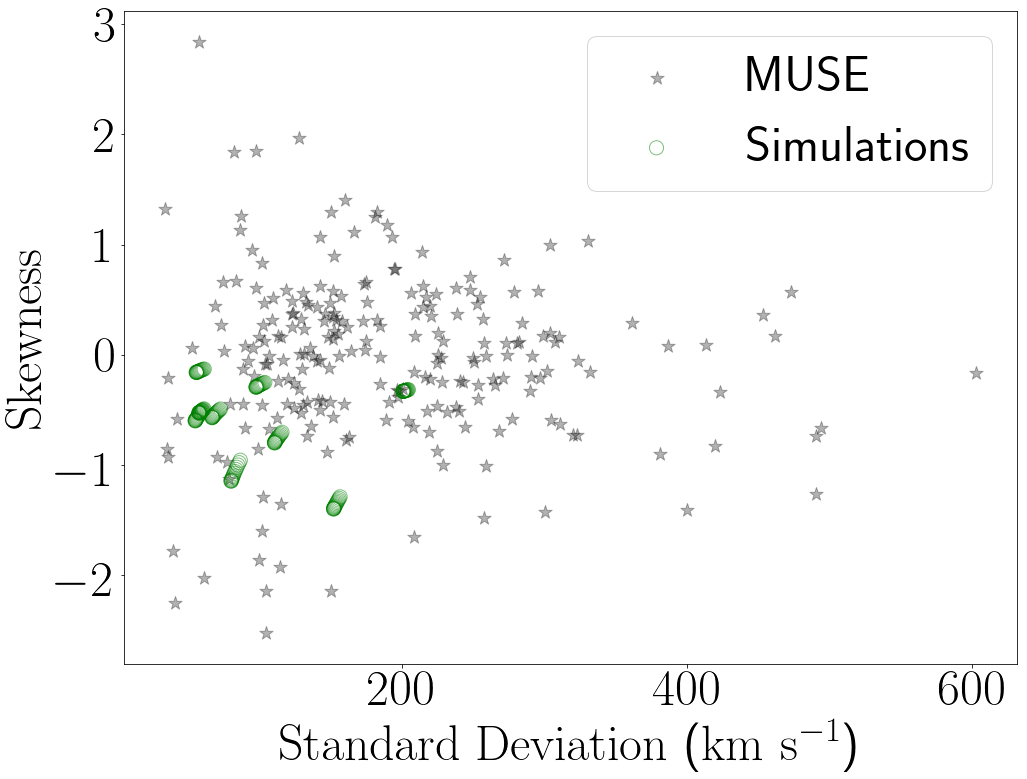

In [66]:
plt.figure(figsize=(16,12))
#plt.scatter(lya_stds, lya_skws, marker='*', alpha=0.3, c='k', label='MUSE', s=200)
plt.scatter(lya_std_qfiltered, lya_skw_qfiltered, marker='*', alpha=0.3, c='k', label='MUSE', s=200)
plt.scatter(std_doppler_scatter, skw_doppler_scatter, marker='o', alpha=0.5, facecolors='none', edgecolors='g', 
            label='Simulations', s=200)
plt.legend()
plt.xlabel('$\mathrm{Standard\;Deviation}$ ($\mathrm{km}$ $\mathrm{s^{-1}}$)')
plt.ylabel('$\mathrm{Skewness}$')
plt.savefig('muse_vs_simulations.pdf', format='pdf', transparent=False, bbox_inches='tight', pad_inches=0.2)

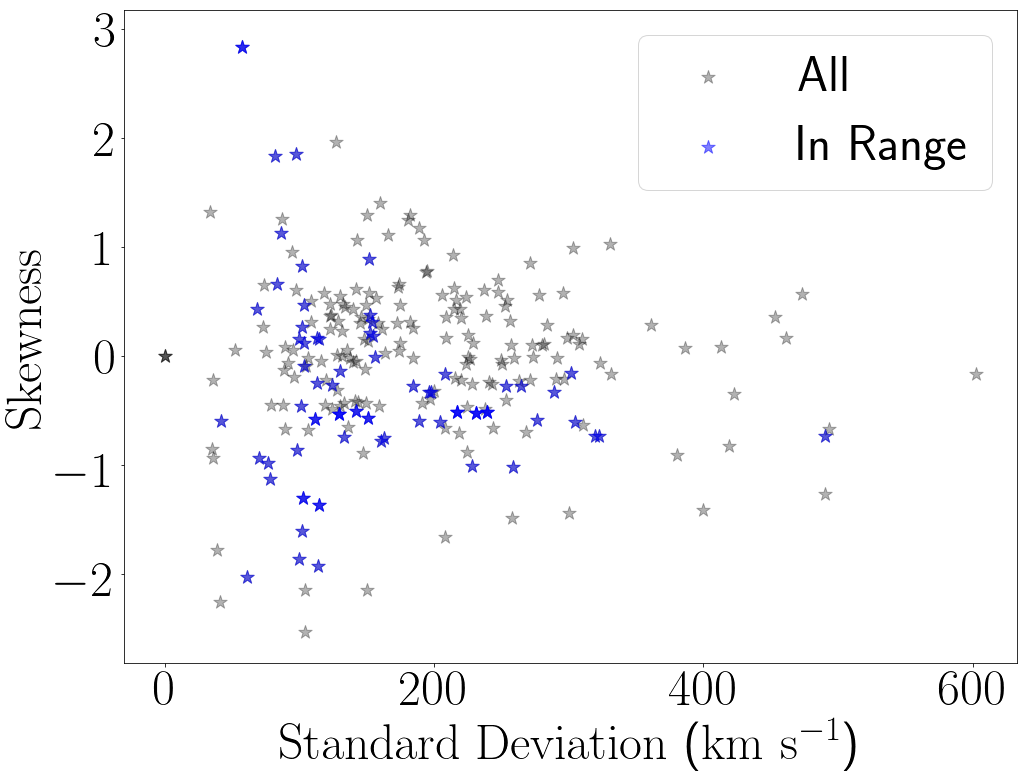

In [67]:
plt.figure(figsize=(16,12))
plt.scatter(lya_stds, lya_skws, marker='*', alpha=0.3, c='k', label='All', s=200)
plt.scatter(candidates_std_scatter, candidates_skw_scatter, marker='*', alpha=0.5, c='b', 
            label='In Range', s=200)
plt.legend()
plt.xlabel('$\mathrm{Standard\;Deviation}$ ($\mathrm{km}$ $\mathrm{s^{-1}}$)')
plt.ylabel('$\mathrm{Skewness}$')
plt.savefig('museall_vs_muserange.pdf', format='pdf', transparent=False, bbox_inches='tight', pad_inches=0.2)

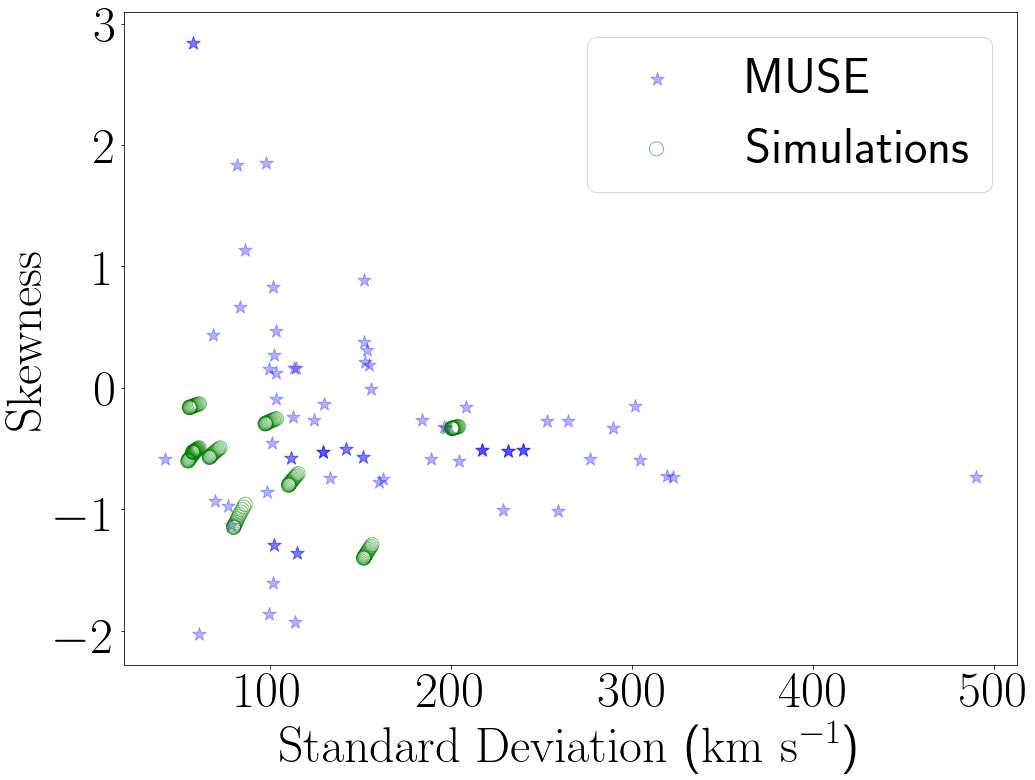

In [68]:
plt.figure(figsize=(16,12))
plt.scatter(candidates_std_scatter, candidates_skw_scatter, marker='*', alpha=0.3, c='b', label='MUSE', s=200)
plt.scatter(std_doppler_scatter, skw_doppler_scatter, marker='o', alpha=0.5, facecolors='none', edgecolors='g', 
            label='Simulations', s=200)
plt.legend()
plt.xlabel('$\mathrm{Standard\;Deviation}$ ($\mathrm{km}$ $\mathrm{s^{-1}}$)')
plt.ylabel('$\mathrm{Skewness}$')
plt.savefig('muserange_vs_simulations.pdf', format='pdf', transparent=False, bbox_inches='tight', pad_inches=0.2)

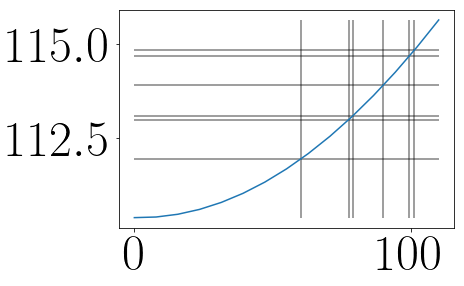

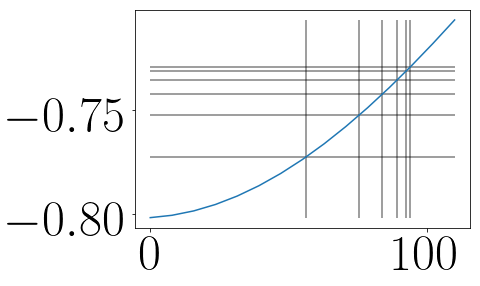

In [35]:
plt.plot(vrots_doppler, std_doppler)
plt.hlines(candidates_std, 0, 110, alpha=0.5)
plt.vlines(candidates_vrot_std, std_min, std_max, alpha=0.5)
plt.show()

plt.plot(vrots_doppler, skw_doppler)
plt.hlines(candidates_skw, 0, 110, alpha=0.5)
plt.vlines(candidates_vrot_skw, skw_min, skw_max, alpha=0.5)
plt.show()

In [137]:
print(candidates_indices_std)

[35, 37, 81, 149, 179, 205]


In [138]:
print(candidates_indices_skw)

[39, 69, 88, 132, 155, 231]


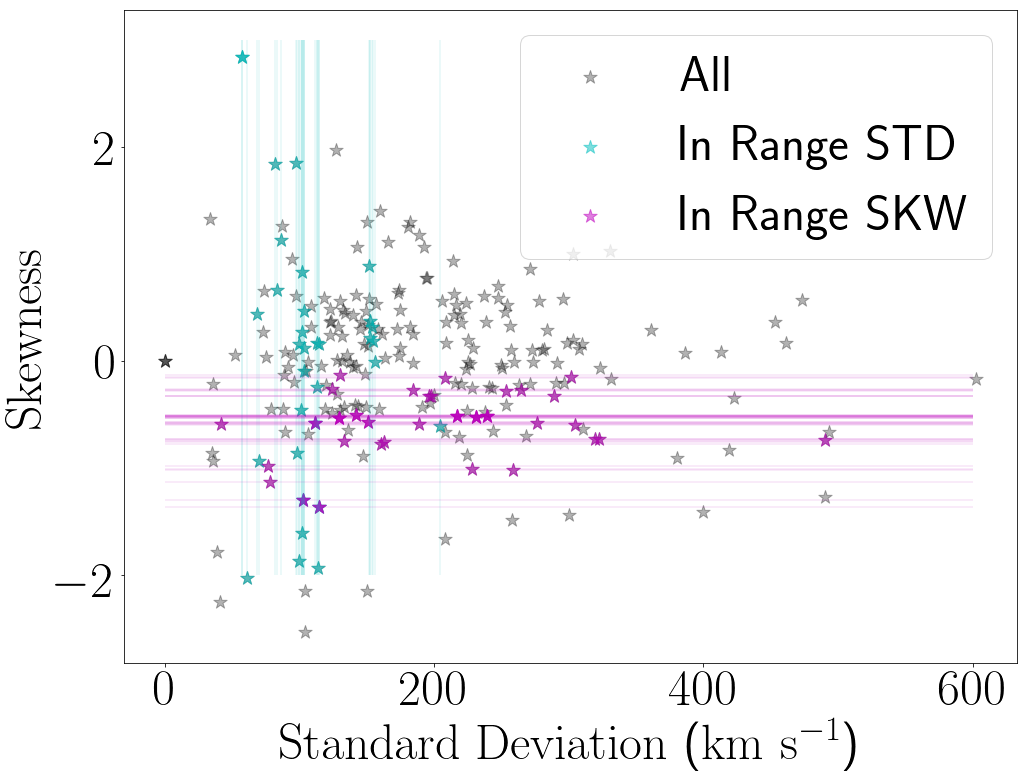

In [75]:
cstd_x, cstd_y = [], []
cskw_x, cskw_y = [], []
for i in range(len(candidates_std_scatter)):
    st = candidates_std_scatter[i]
    sk = candidates_skw_scatter[i]
    if (st in candidates_std_only_scatter):
        cstd_x.append(st)
        cstd_y.append(sk)
    if (sk in candidates_skw_only_scatter):
        cskw_x.append(st)
        cskw_y.append(sk)

plt.figure(figsize=(16,12))
plt.scatter(lya_stds, lya_skws, marker='*', alpha=0.3, c='k', label='All', s=200)
plt.scatter(cstd_x, cstd_y, marker='*', alpha=0.5, c='c', label='In Range STD', s=200)
plt.scatter(cskw_x, cskw_y, marker='*', alpha=0.5, c='m', label='In Range SKW', s=200)
plt.vlines(candidates_std_only_scatter, -2, 3, alpha=0.1, color='c')
plt.hlines(candidates_skw_only_scatter, 0, 600, alpha=0.1, color='m')
plt.legend()
plt.xlabel('$\mathrm{Standard\;Deviation}$ ($\mathrm{km}$ $\mathrm{s^{-1}}$)')
plt.ylabel('$\mathrm{Skewness}$')
plt.savefig('muse_std_skw_lines.pdf', format='pdf', transparent=False, bbox_inches='tight', pad_inches=0.2)